In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [ ]:
df = pd.read_csv(r'/content/card_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.isnull().sum()


,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


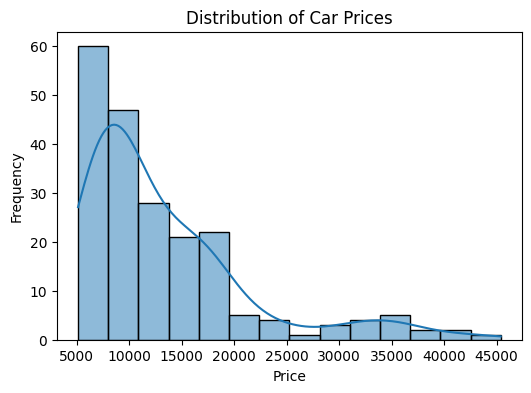

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df['price'] = np.log10(df['price'])

# log 10 của giá


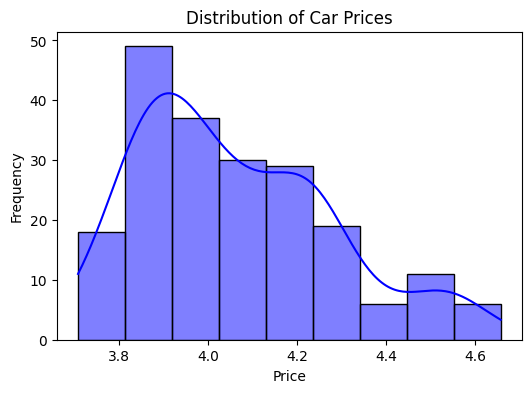

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

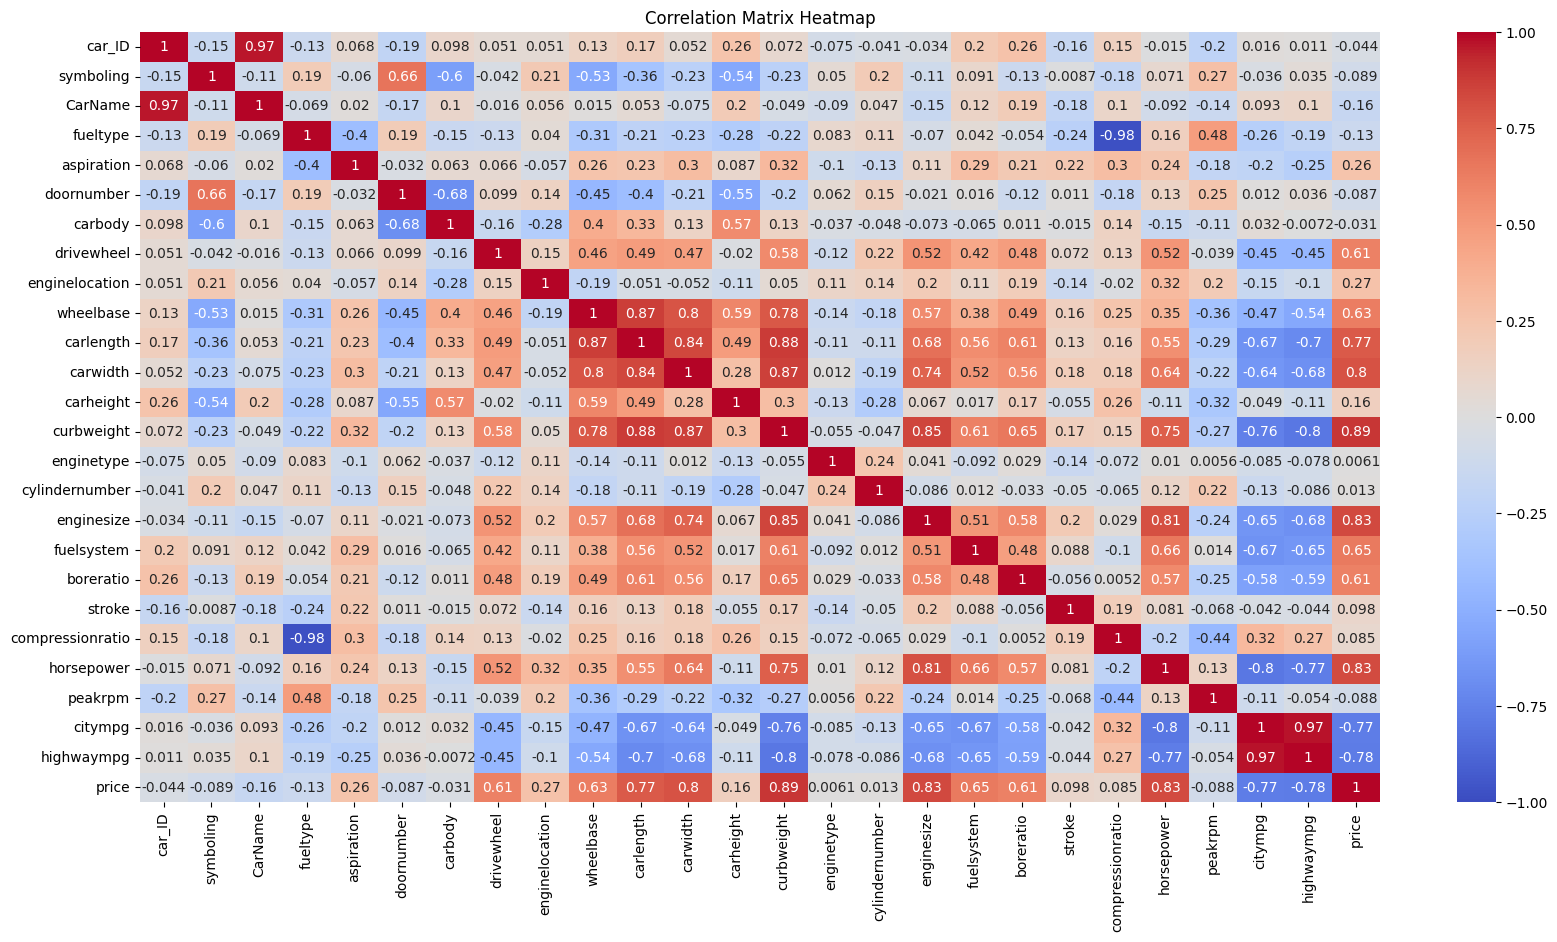

In [ ]:
corr_matrix = df.corr()
# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
strong_correlation_cols = [col for col in corr_matrix.columns if abs(corr_matrix.loc['price', col]) >= 0.09 and col != 'price']

X = df[strong_correlation_cols]
y = df['price']

strong_correlation_cols

['CarName',
 'fueltype',
 'aspiration',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'horsepower',
 'citympg',
 'highwaympg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

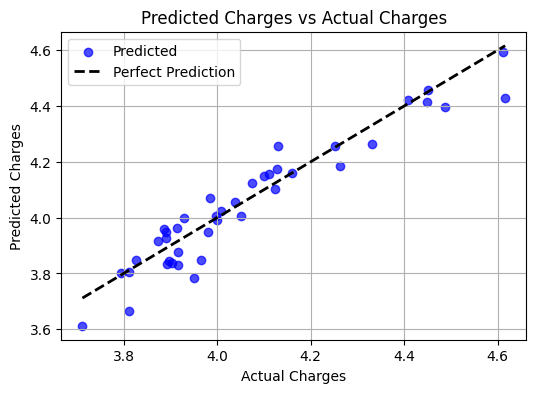

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Predicted Charges vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)
mse = mean_squared_error(y_test , y_pred)
print(mse)
mae = mean_absolute_error(y_test , y_pred)
print(mae)

0.9027880306968769
0.004974836944445496
0.054801568523114186


In [ ]:
1000 -> 3

In [ ]:
#TODO: tính độ lỗi MAE, MSE dựa trên giá trị thật
# Bằng cách dùng inverse transform (ban đầu log10 giá trị -> đảo ngược lại bằng 10**n)
#TODO: có thử thêm 2 model khác để xem performance như thế nào ?
#TODO: trong slide thêm phần preprocessing -> rất quan trọng cho bài final project